Denoising Auto-Encoder

 * MNIST dataset: https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html
 

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
torch.Size([28, 28]) torch.uint8 tensor(0, dtype=torch.uint8) tensor(2

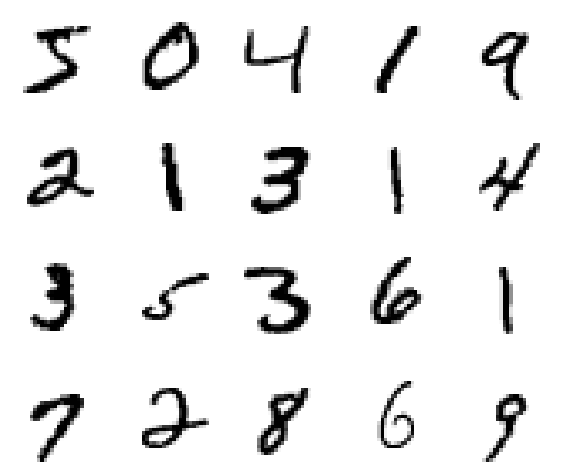

In [20]:
mnist = torchvision.datasets.MNIST(
    root="./data", train=True,
    download=True
)

fig, axes = plt.subplots(4, 5, figsize=(7, 6))
axes = axes.ravel()
for i in range(20):
    print(mnist.data[i].shape, mnist.data[i].dtype, mnist.data[i].min(), mnist.data[i].max())
    axes[i].imshow(mnist.data[i], cmap='gray_r')
    axes[i].axis('off')
plt.show()

In [11]:
# build a convolutional denoising autoencoder
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # bx16x14x14
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # bx32x7x7
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 7)                       # bx64x1x1
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),             # bx32x7x7
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # bx16x14x14
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),  # bx1x28x28
            nn.Sigmoid()  # to keep the output in the range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


torch.Size([1, 28, 28]) torch.float32 tensor(-1.8077) tensor(2.1907)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.6602) tensor(2.4145)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.6101) tensor(1.9779)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.5527) tensor(2.1167)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.6526) tensor(2.3217)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.8123) tensor(2.1255)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.6311) tensor(2.1977)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.4202) tensor(2.3244)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.4071) tensor(1.7520)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.8821) tensor(2.0370)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.4337) tensor(2.0869)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.3426) tensor(1.6911)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.6164) tensor(2.3158)
torch.Size([1, 28, 28]) torch.float32 tensor(-1.6158) tensor(2.0839)
torch.Size([1, 28, 28]) torch.floa

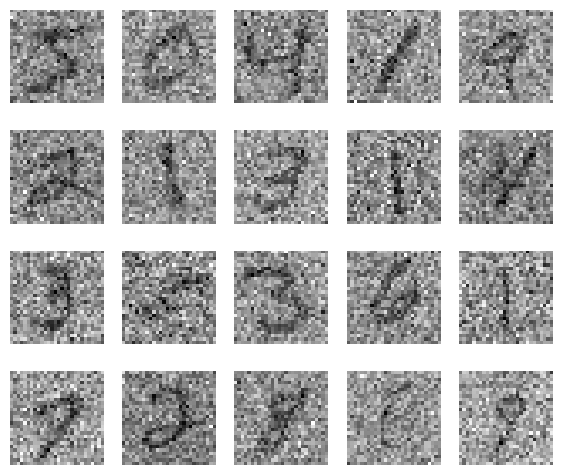

In [16]:
# hyperparameters
num_epochs = 20
learning_rate = 1e-3
batch_size = 64
noise_factor = 0.5

train_transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(mean=(0.5,), std=(0.5,)),
    transforms.Lambda(lambda x: x + noise_factor * torch.randn_like(x))
])
# MNIST dataset
train_dataset = datasets.MNIST(
    root='./data', train=True,
    download=True, transform=train_transform
)
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)

fig, axes = plt.subplots(4, 5, figsize=(7, 6))
axes = axes.ravel()
for i in range(20):
    img, _ = train_dataset[i]
    print(img.shape, img.dtype, img.min(), img.max())
    img = img.numpy().squeeze()
    axes[i].imshow(img, cmap='gray_r')
    axes[i].axis('off')
plt.show()
